<a href="https://colab.research.google.com/github/MuznaTazyeen/FUTURE_DS_03/blob/main/FutureInterns_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"areyoufocused27","key":"8d23e9841a7c8a934250fdab27dc7468"}'}

In [ ]:
#create kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy kaggle.json to created folder
!cp kaggle.json ~/.kaggle/

In [ ]:
#permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list datasets available in kaggle
!kaggle datasets list

ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                  Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          30814        708  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets        Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          17218        298  1.0              
navjotkaushal/coffee-sales-dataset                           Coffee Sales Dataset                                     38970  2025-08-19 09:37:30.057000           3525         45  0.8235294        
pratyushpuri/mu

In [ ]:
!kaggle datasets list -s 'student-feedback-survey-responses'

ref                                                    title                                         size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ruchi798/student-feedback-survey-responses             Student Feedback Survey Responses            10242  2022-03-10 08:08:52.243000           3826         71  1.0              
harriken/survey-academics                              Survey Academics                            119093  2020-10-04 09:21:43.823000            470         11  0.9705882        
willianoliveiragibin/chatbots-in-education             Chatbots in Education                         6683  2024-09-14 19:38:58.857000            435          1  1.0              
affafghani/peer-tutoring-dataset                       Peer-Tutoring-Dataset                         5037

In [ ]:
!kaggle datasets download -d 'ruchi798/student-feedback-survey-responses' -p /Downloads

Dataset URL: https://www.kaggle.com/datasets/ruchi798/student-feedback-survey-responses
License(s): Attribution 4.0 International (CC BY 4.0)
student-feedback-survey-responses.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls -ltr ../Downloads

total 40
-rw-r--r-- 1 root root 10242 Mar 10  2022 student-feedback-survey-responses.zip
-rwxrwxrwx 1 root root 24877 Mar 10  2022 student_feedback.csv*


In [ ]:
!unzip ../Downloads/student-feedback-survey-responses.zip -d ../Downloads

Archive:  ../Downloads/student-feedback-survey-responses.zip
replace ../Downloads/student_feedback.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!chmod 777 ../Downloads/student_feedback.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# read in data
df = pd.read_csv('/Downloads/student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
print(df.shape)

(1001, 10)


## EDA

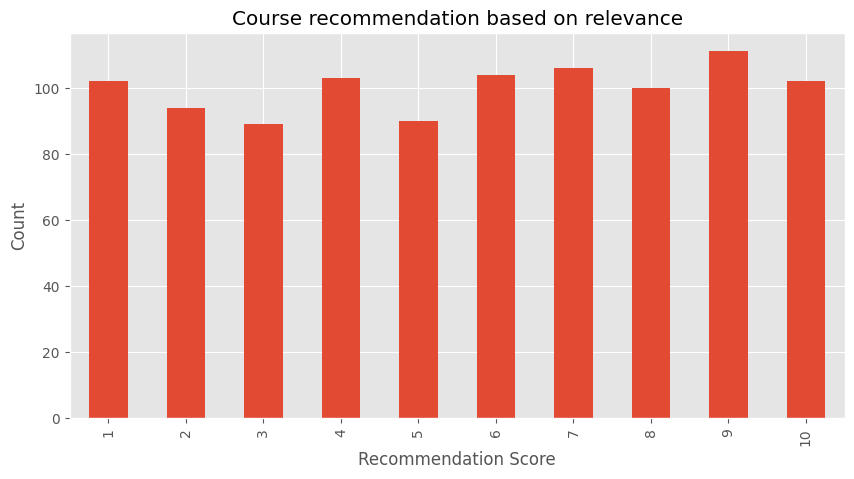

In [ ]:
df['Course recommendation based on relevance'].value_counts().sort_index().plot(kind='bar',
                                                                                title='Course recommendation based on relevance',
                                                                                xlabel='Recommendation Score', ylabel='Count',
                                                                                figsize=(10,5))
plt.show()

##Basic NLTK

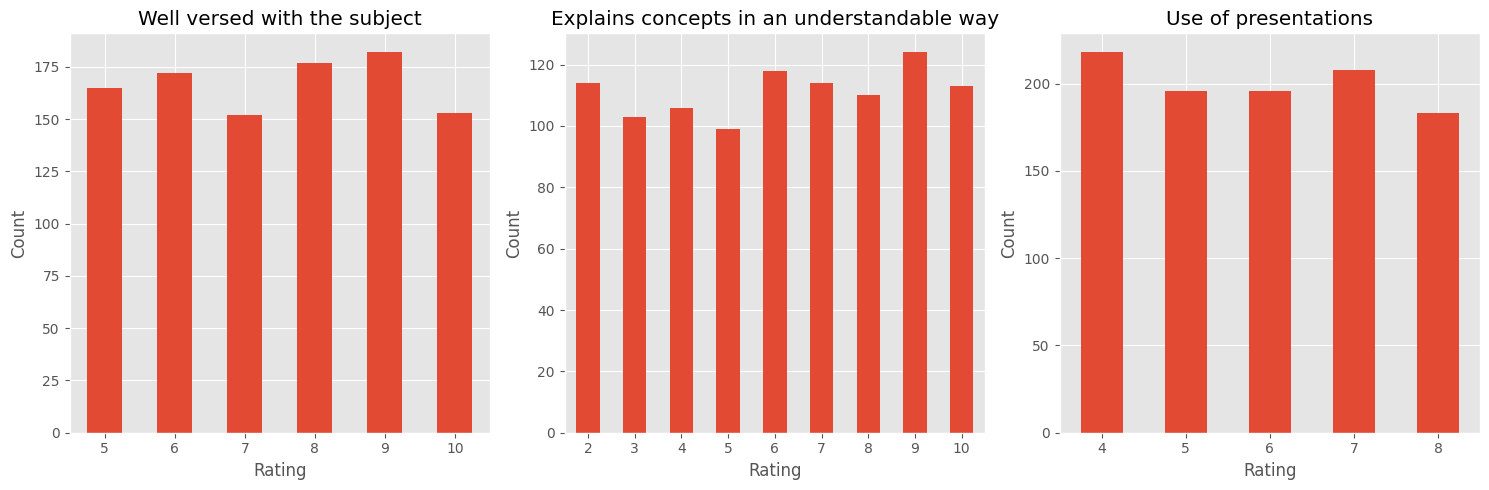

In [ ]:
# Create bar charts for a few rating columns
rating_columns_to_plot = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations'
]

plt.figure(figsize=(15, 5))

for i, column in enumerate(rating_columns_to_plot):
    plt.subplot(1, len(rating_columns_to_plot), i + 1)
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0) # Rotate x-axis labels back to horizontal for bar charts

plt.tight_layout()
plt.show()

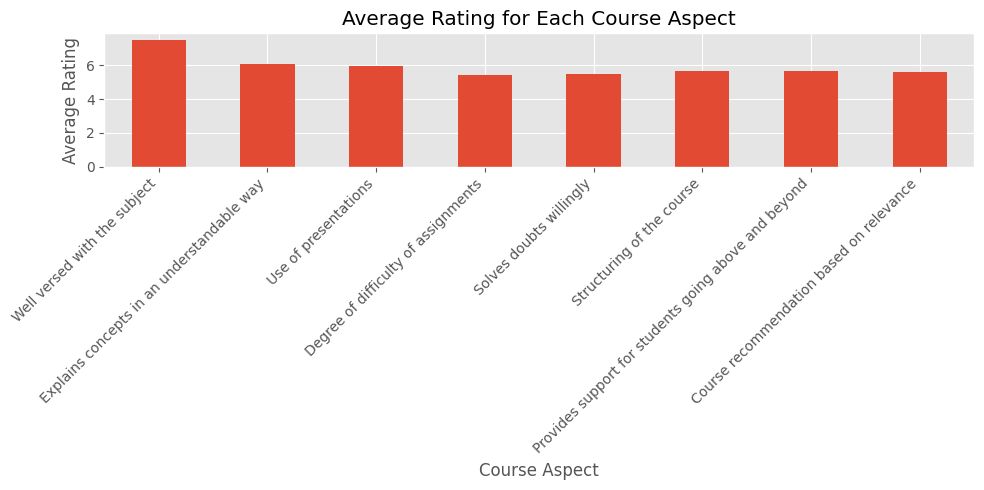

In [ ]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Calculate the average rating for each column
average_ratings = df[rating_columns].mean()

# Create a bar chart of the average ratings
plt.figure(figsize=(10, 5))
average_ratings.plot(kind='bar')
plt.title('Average Rating for Each Course Aspect')
plt.xlabel('Course Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()